# Cho dữ liệu titanic3.csv chứa thông tin về các hành khách trên ccon tàu titanic

## Một trong những thông tin quan trọng để dự đoán một hành khách còn sống hay đã chết là 'age', 'fare'. Kiểm tra xem dữ liệu trên 2 cột này có null hay không, nếu có hãy xóa bỏ các dòng null. Phân tích thông tin sơ bộ về dữ liệu trên hai thuộc tính này. Trực quan hóa dữ liệu.

In [62]:
def drawHistAndDistPlot(data):
    plt.subplot(1, 2, 1)
    plt.hist(data)
    plt.subplot(1, 2, 2)
    sns.distplot(data)
    plt.show()

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('./titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [65]:
age = df.age
fare = df.fare

In [66]:
print('percentage of null in age: {}%'.format(age.isnull().count() / age.count()))
print('percentage of null in fare: {}%'.format(fare.isnull().count() / age.count()))

percentage of null in age: 1.251434034416826%
percentage of null in fare: 1.251434034416826%


### Nhận xét:
* fare và age chỉ có khoản 1.2% data bị null, nên có thể drop được.

In [67]:
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S


In [68]:
df = df.dropna()
df.describe()

,pclass,age,sibsp,parch,fare
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,2.209012,29.813199,0.504314,0.421860,36.603024
std,0.840685,14.366261,0.913080,0.840655,55.753648
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,8.050000
50%,2.000000,28.000000,0.000000,0.000000,15.750000
75%,3.000000,39.000000,1.000000,1.000000,35.077100
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
np.ptp(df.age)

79.8333

In [70]:
np.ptp(df.fare)

512.3292

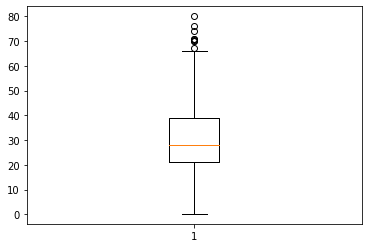

In [71]:
plt.boxplot(df.age)
plt.show()

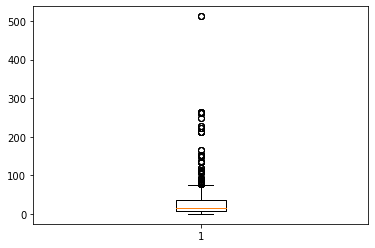

In [72]:
plt.boxplot(df.fare)
plt.show()

### Nhận xét:
* Có khoảng cách lớn giữa min và max
* 2 thang đo cho 2 cột khác nhau

In [73]:
df.age.skew()

0.40688028266803467

In [74]:
df.fare.skew()

4.122508729348891

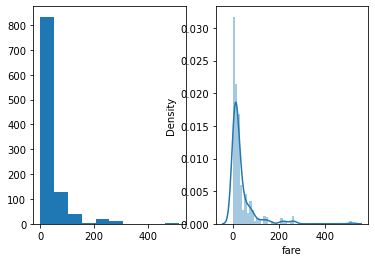

In [75]:
drawHistAndDistPlot(df.fare)

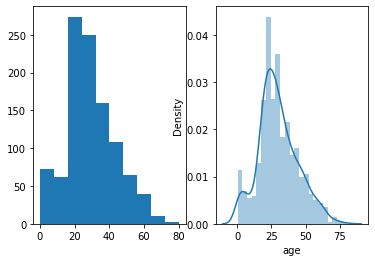

In [76]:
drawHistAndDistPlot(df.age)

### Nhận xét:
* Nhìn biểu đồ trên và giá trị skew ta thấy age có phân phối tương đối chuẩn, còn phân bố fare thì lệch phải và có outlier
* => Chọn Robust Scaler??? Standard Scaler ?? => Sẽ kiểm chứng khi áp dụng mô hình

## Để việc dự đoán tốt hơn cần phải kiểm tra và chuẩn hóa dữ liệu. Hãy chọn một phươn pháp để chuẩn hóa dữ liệu dựa trên thông tin nêu trên.

In [77]:
from sklearn import preprocessing

In [78]:
age_fare = df[['age', 'fare']].astype('float64')
age_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1043 non-null   float64
 1   fare    1043 non-null   float64
dtypes: float64(2)
memory usage: 24.4 KB


## Robust Scaler

In [79]:
scaler = preprocessing.RobustScaler()
robust_scaler = scaler.fit_transform(age_fare)
data = pd.DataFrame(robust_scaler, columns=['age_scaler', 'fare_scaler'])
data.head()

,age_scaler,fare_scaler
0,0.055556,7.236718
1,-1.504628,5.024586
2,-1.444444,5.024586
3,0.111111,5.024586
4,-0.166667,5.024586


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age_scaler   1043 non-null   float64
 1   fare_scaler  1043 non-null   float64
dtypes: float64(2)
memory usage: 16.4 KB


In [81]:
df['age_scaler'] = data.age_scaler.values
df['fare_scaler'] = data.fare_scaler.values
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,age_scaler,fare_scaler
0,1,female,29.0000,0,0,211.3375,S,0.055556,7.236718
1,1,male,0.9167,1,2,151.5500,S,-1.504628,5.024586
2,1,female,2.0000,1,2,151.5500,S,-1.444444,5.024586
3,1,male,30.0000,1,2,151.5500,S,0.111111,5.024586
4,1,female,25.0000,1,2,151.5500,S,-0.166667,5.024586


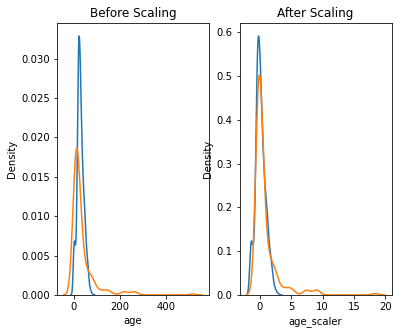

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['age'], ax = ax1)
sns.kdeplot(df['fare'], ax = ax1)

ax2.set_title('After Scaling')
sns.kdeplot(df['age_scaler'], ax = ax2)
sns.kdeplot(df['fare_scaler'], ax = ax2)

plt.show()

### Standard Scaler

In [86]:
scaler1 = preprocessing.StandardScaler()
ss_scaler = scaler1.fit_transform(df[['age', 'fare']]).astype('float64')
df1 = pd.DataFrame(ss_scaler, columns=['age_ss', 'fare_ss'])
df1.head()

,age_ss,fare_ss
0,-0.056632,3.135549
1,-2.012379,2.062683
2,-1.936937,2.062683
3,0.013009,2.062683
4,-0.335196,2.062683


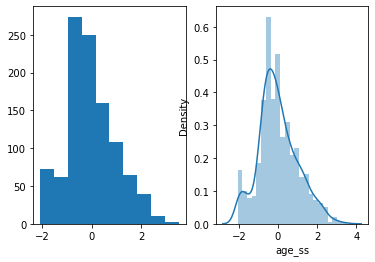

In [87]:
drawHistAndDistPlot(df1.age_ss)

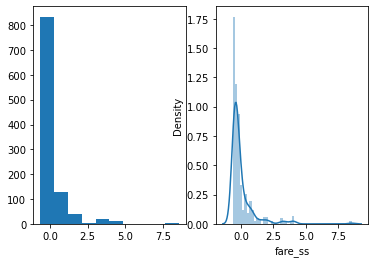

In [88]:
drawHistAndDistPlot(df1.fare_ss)

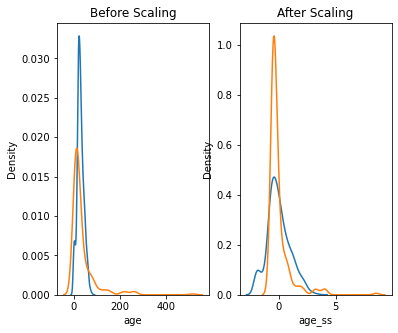

In [90]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['age'], ax=ax1)
sns.kdeplot(df['fare'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(df1.age_ss, ax=ax2)
sns.kdeplot(df1.fare_ss, ax=ax2)

plt.show()